#  일원 배치 분산분석 실습
- Python 에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자 

* 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다. 
- 귀무가설(H0): 세 가지 종에 대해 Sepal.Width의 평균은 모두 같다. 
- 대립가설(H1): 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다. 

--------------------------
<b>1. 분산분석</b>

In [3]:
import scipy.stats as stats
import pandas as pd

iris_data = pd.read_csv('./data/iris.csv')
iris_data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
iris_data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

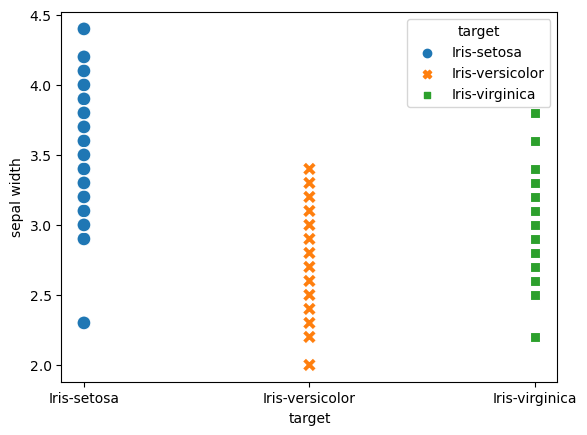

In [13]:
# 시각화 하기
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot by Groups

sns.scatterplot(x='target', y='sepal width', hue='target', 
                style='target', s=100, data=iris_data)
plt.show()

In [15]:
target_list = iris_data['target'].unique()

In [16]:
target_list

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
# target변수별로 sepal width값을 시리즈로 저장하기
setosa = iris_data[iris_data['target']==target_list[0]]['sepal width']
versicolor = iris_data[iris_data['target']==target_list[1]]['sepal width']
virginica = iris_data[iris_data['target']==target_list[2]]['sepal width']

In [19]:
type(setosa)

pandas.core.series.Series